In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# AdaLine

## part 1

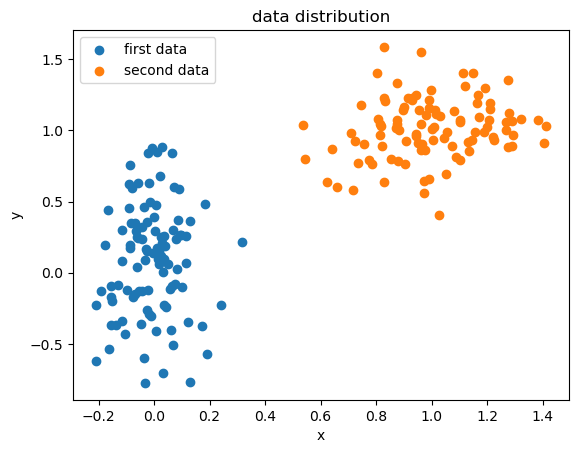

In [83]:
n = 100
firstX=np.random.normal(size=n,loc=0,scale=0.1);
firstY=np.random.normal(size=n,loc=0,scale=0.4);
secondX=np.random.normal(size=n,loc=1,scale=0.2);
secondY=np.random.normal(size=n,loc=1,scale=0.2);
plt.scatter(firstX,firstY,);
plt.scatter(secondX,secondY);
plt.title('data distribution');
plt.legend(['first data','second data']);
plt.xlabel('x')
plt.ylabel('y');

Text(0, 0.5, 'loss')

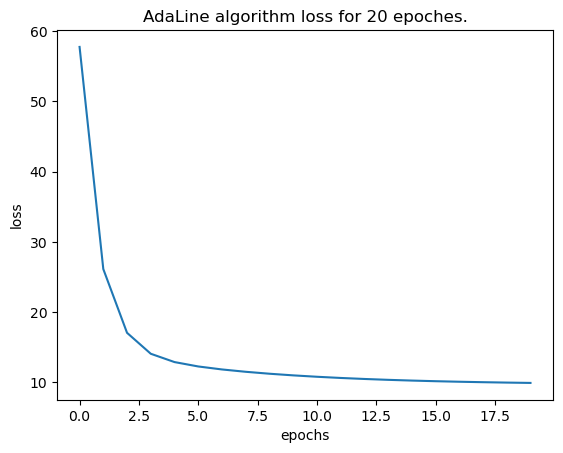

In [84]:
data1 = [(firstX[i], firstY[i], 1) for i in range(n)]
data2 = [(secondY[i], secondY[i], -1) for i in range(n)]
data = np.vstack((data1, data2))

np.random.shuffle(data)
x1train = data[:, 0]
x2train = data[:, 1]
trainLabel = data[:, 2]


def forwardprop(w1, w2, b, x1, x2):
    net = w1*x1+w2*x2+b
    return net


def backprop(w1, w2, b, net, Label, lr, x1, x2):
    w1 += lr*(Label-net)*x1
    w2 += lr*(Label-net)*x2
    b += lr*(Label-net)
    return w1, w2, b


w1 = w2 = 0.01
b = 0.01
lr = 0.01
epoch = 20
loss = []
for j in range(epoch):
    error = []
    for i in range(200):
        net = forwardprop(w1, w2, b, x1train[i], x2train[i])
        w1, w2, b = backprop(
            w1, w2, b, net, trainLabel[i], lr, x1train[i], x2train[i])
        error.append(1/2*(trainLabel[i]-net)**2)
    loss.append(sum(error))


plt.plot(loss)
plt.title(f'AdaLine algorithm loss for {epoch} epoches.')
plt.xlabel('epochs')
plt.ylabel('loss')


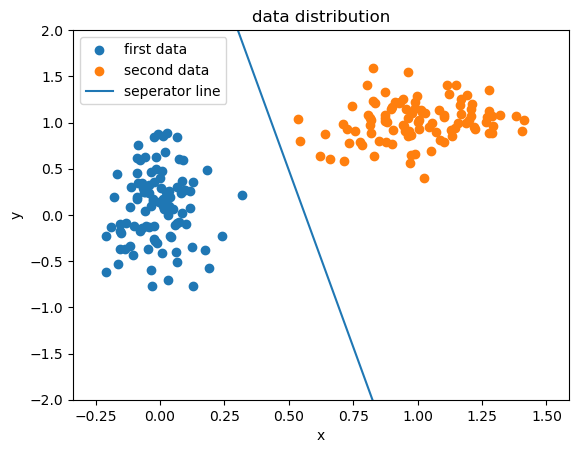

In [86]:
x=np.linspace(-0.25,1.5,100)
plt.scatter(firstX,firstY,);
plt.scatter(secondX,secondY);
plt.plot(x,-w1/w2*x-b/w2);
plt.ylim([-2,2])
plt.title('data distribution');
plt.legend(['first data','second data', 'seperator line']);
plt.xlabel('x')
plt.ylabel('y');

## part 2

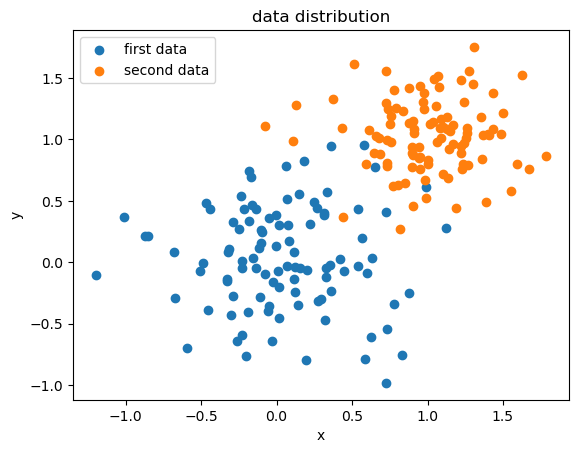

In [97]:
n = 100
firstX=np.random.normal(size=n,loc=0,scale=0.4);
firstY=np.random.normal(size=n,loc=0,scale=0.4);
secondX=np.random.normal(size=n,loc=1,scale=0.3);
secondY=np.random.normal(size=n,loc=1,scale=0.3);
plt.scatter(firstX,firstY,);
plt.scatter(secondX,secondY);
plt.title('data distribution');
plt.legend(['first data','second data']);
plt.xlabel('x')
plt.ylabel('y');

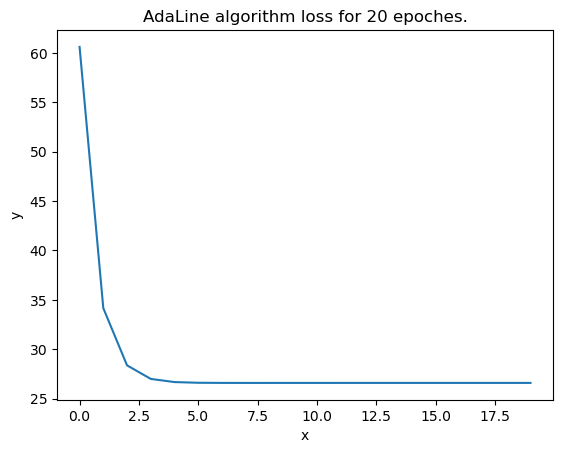

In [98]:
data1 = [(firstX[i], firstY[i], 1) for i in range(n)]
data2 = [(secondY[i], secondY[i], -1) for i in range(n)]
data = np.vstack((data1, data2))

np.random.shuffle(data)
x1train = data[:, 0]
x2train = data[:, 1]
trainLabel = data[:, 2]


def forwardprop(w1, w2, b, x1, x2):
    net = w1*x1+w2*x2+b
    return net


def backprop(w1, w2, b, net, Label, lr, x1, x2):
    w1 += lr*(Label-net)*x1
    w2 += lr*(Label-net)*x2
    b += lr*(Label-net)
    return w1, w2, b


w1 = w2 = 0.01
b = 0.01
lr = 0.01
epoch = 20
loss = []
for j in range(epoch):
    error = []
    for i in range(200):
        net = forwardprop(w1, w2, b, x1train[i], x2train[i])
        w1, w2, b = backprop(
            w1, w2, b, net, trainLabel[i], lr, x1train[i], x2train[i])
        error.append(1/2*(trainLabel[i]-net)**2)
    loss.append(sum(error))


plt.plot(loss)
plt.title(f'AdaLine algorithm loss for {epoch} epoches.')
plt.xlabel('epochs')
plt.ylabel('loss');
plt.xlabel('x')
plt.ylabel('y');

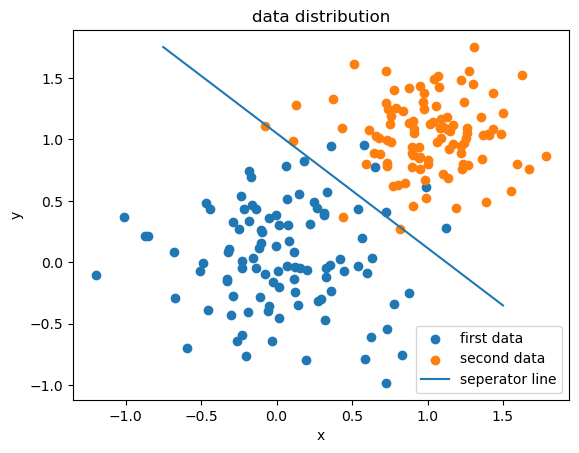

In [99]:
x=np.linspace(-0.75,1.5,100)
plt.scatter(firstX,firstY,);
plt.scatter(secondX,secondY);
plt.plot(x,-w1/w2*x-b/w2);
plt.title('data distribution');
plt.legend(['first data','second data', 'seperator line']);
plt.xlabel('x')
plt.ylabel('y');

# MadaLine

In [2]:
import pandas as pd 

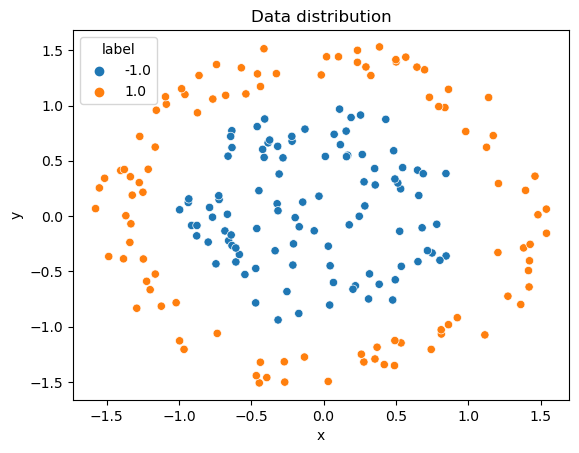

In [3]:
data = pd.read_csv('Q2_Dataset/MadaLine.csv', names=['x', 'y', 'label'])
data['label'].replace(0.0, -1.0, inplace=True)
data = data.sample(frac=1)
xtrain = data.iloc[:,0]
ytrain = data.iloc[:,1]
label = data.iloc[:,2]
sns.scatterplot(data=data, x = data.columns[0], y = data.columns[1], hue=data.columns[2], palette='tab10')
plt.title('Data distribution');

In [49]:
class MadaLine():
    def __init__(self, data, m,lr = 0.001):
        self.data = data
        self.m = m
        self.lr = lr
        self.n = len(data.index)
        self.W = np.random.random(size=(2, m))/1000.
        self.B = np.random.random(size=m+1)/100.
        self.B[-1]=m-1.0
        self.V = np.ones((m,))

    def forwardprop(self, sample, W, B, V):
        sample = np.array(sample)[:2]
        Z_in = B[:-1]+np.matmul(sample, W)
        Z = np.sign(Z_in+1e-9)
        y_in = B[-1] + sum(Z*V)
        y = np.sign(y_in+1e-9) 
        return Z_in, Z, y_in, y


    def backprop(self, sample, y, W, B, Z_in):
        label = np.array(sample)[2]
        X = np.array(sample)[:2]

        if label == y:
            pass
        elif label == 1:
            j = np.argmax(Z_in)
            B[j] += self.lr*(1-Z_in[j])
            aa = self.lr*(1-Z_in[j])*X
            W[:,j] += aa

        elif label == -1:
            for k in range(self.m):
                if Z_in[k]>0:
                    B[k] += self.lr*(-1-Z_in[k])
                    W[:,k] += self.lr*((-1-Z_in[k])*X)

        return W, B

    def fit(self):
        V = self.V
        B = self.B
        W = self.W
        n = self.n
    
        error = []
        max_epoch = 100
        self.epoch = 0
        loss = []
        while True:
            error = []
            for i in range(n):
                sample = self.data.iloc[i]
                Z_in, Z, y_in, y = self.forwardprop(sample, W, B, V)
                W, B = self.backprop(sample, y, W, B, Z_in)
                error.append(0.5*(sample['label']-y)**2)
            loss.append(sum(error))
            self.epoch += 1
            if loss[-1]==0 or self.epoch >= max_epoch:
                break

        return loss, epoch, W, B
    def get_accuracy(self):
        V = self.V
        B = self.B
        W = self.W
        n = self.n
        m = self.m
        acc = 0
        for i in range(n):
            sample = data.iloc[i]
            predict = self.forwardprop(sample, W, B, V)[-1]
            if predict == sample.label:
                acc +=1
        print(f'model with {m} AdaLines has {acc/n*100}% accuracy')
        print(f'model with {m} AdaLines finished {self.epoch} epochs')

    def plot_lines(self):

        B = self.B
        W = self.W
        m = self.m
        x=np.linspace(-2,2,100)
        sns.scatterplot(data=data, x = data.columns[0], y = data.columns[1], hue=data.columns[2], palette='tab10')
        plt.title(f'MadaLine Seperator Network with {m} Lines');
        for i in range(m):
            plt.plot(x,-W[0][i]/W[1][i]*x-B[i]/W[1][i]);
        plt.ylim([-3,3])

model with 3 AdaLines has 90.5% accuracy
model with 3 AdaLines finished 100 epochs


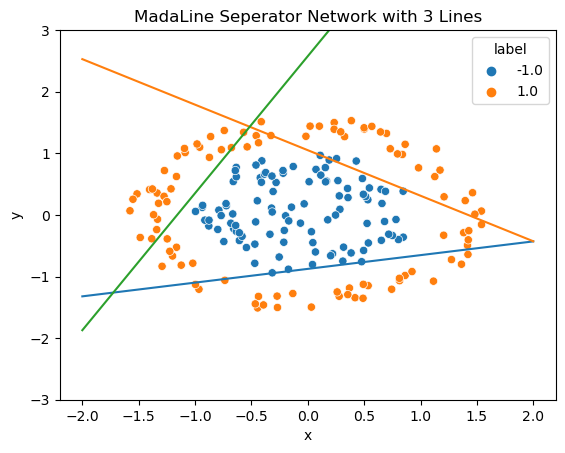

In [50]:
mad3 = MadaLine(data = data, m = 3)
loss3, _, _, _ = mad3.fit()
mad3.get_accuracy()
mad3.plot_lines()

model with 4 AdaLines has 100.0% accuracy
model with 4 AdaLines finished 13 epochs


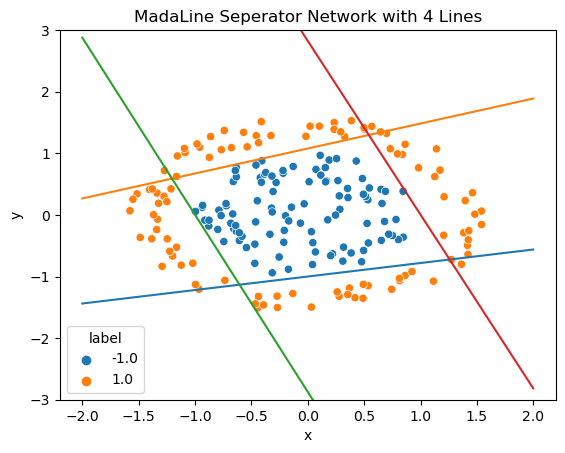

In [51]:
mad4 = MadaLine(data = data, m = 4)
loss4, _, _, _ = mad4.fit()
mad4.get_accuracy()
mad4.plot_lines()

model with 10 AdaLines has 100.0% accuracy
model with 10 AdaLines finished 6 epochs


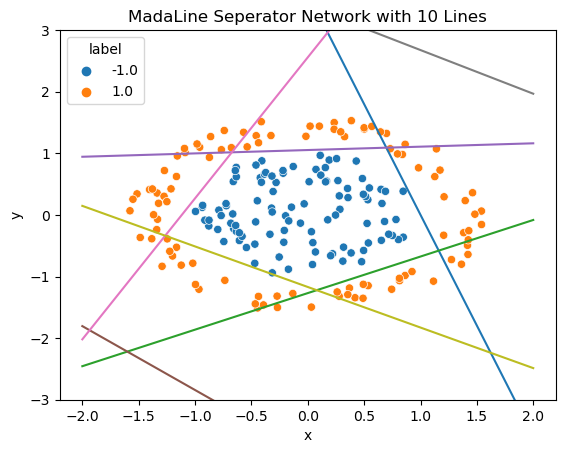

In [52]:
mad10 = MadaLine(data = data, m = 10)
loss10, _, _, _ = mad10.fit()
mad10.get_accuracy()
mad10.plot_lines()

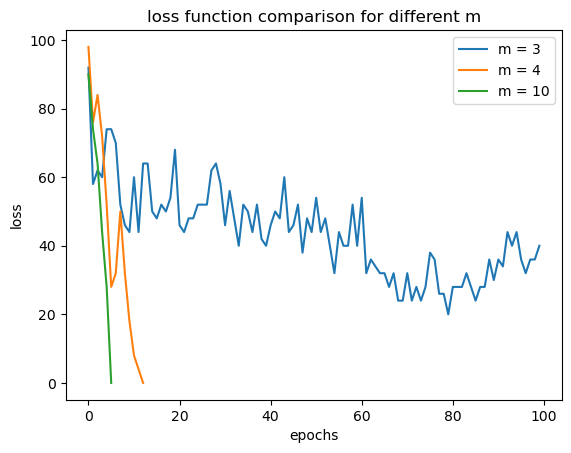

In [53]:
plt.plot(loss3)
plt.plot(loss4)
plt.plot(loss10)
plt.title('loss function comparison for different m')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['m = 3','m = 4','m = 10'])